In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from wordcloud import WordCloud
from collections import Counter

In [3]:
df = pd.read_csv("preprocessing_data.csv")

In [4]:
df_non_na = df.dropna()

In [5]:
corr_lst = ["month_upload_count","duration","view_count","likes","dislikes","comment_count"]

In [6]:
corr = df_non_na.loc[:,corr_lst].corr()

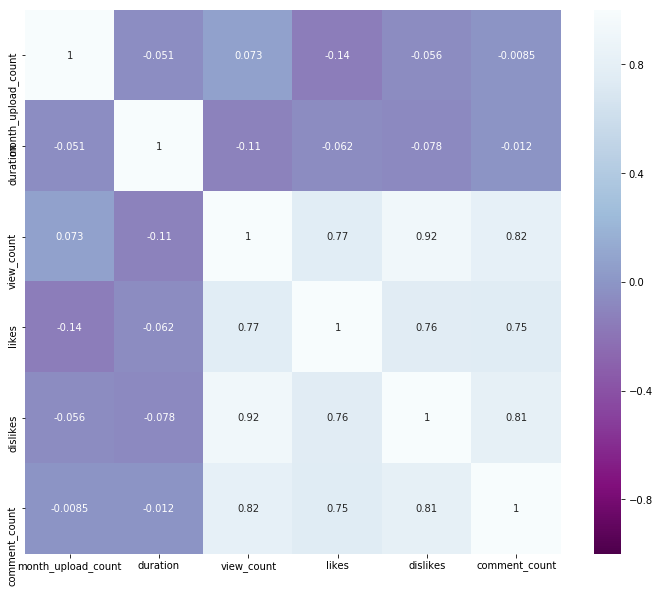

In [7]:
plt.rcParams["figure.figsize"] = (12,10)
sns.heatmap(corr,
           annot = True,
           cmap = 'BuPu_r', 
           vmin = -1, vmax=1)

In [8]:
df_non_na.loc[df_non_na["published_year"]==2018,corr_lst].corr()

,month_upload_count,duration,view_count,likes,dislikes,comment_count
month_upload_count,1.000000,-0.223930,0.017989,-0.050524,-0.002362,0.023850
duration,-0.223930,1.000000,-0.127837,-0.047722,-0.050010,-0.015981
view_count,0.017989,-0.127837,1.000000,0.774677,0.843758,0.678673
likes,-0.050524,-0.047722,0.774677,1.000000,0.733566,0.789239
dislikes,-0.002362,-0.050010,0.843758,0.733566,1.000000,0.657399
comment_count,0.023850,-0.015981,0.678673,0.789239,0.657399,1.000000


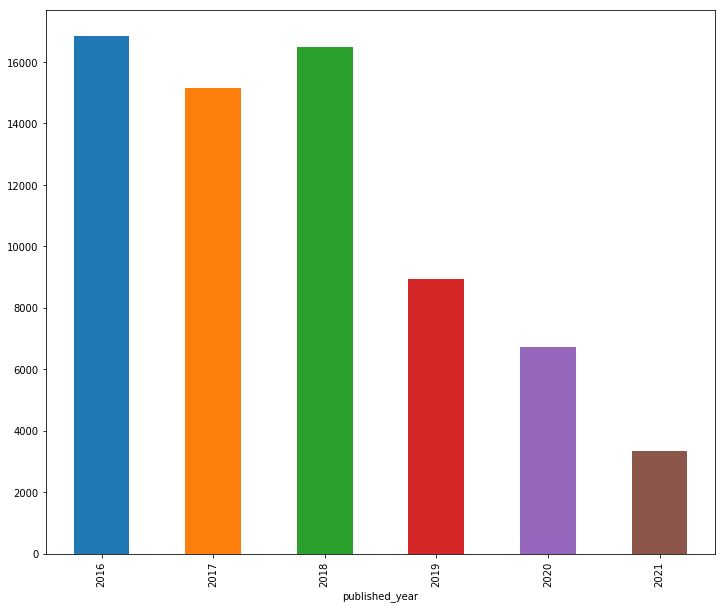

In [9]:
df_non_na.groupby("published_year")["view_count"].mean().round(2).plot(kind="bar")

In [11]:
df_non_na["title"] = df_non_na["title"].str.lower().copy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_vlog = df_non_na[df_non_na["title"].str.contains("vlog|브이로그",na=False)]

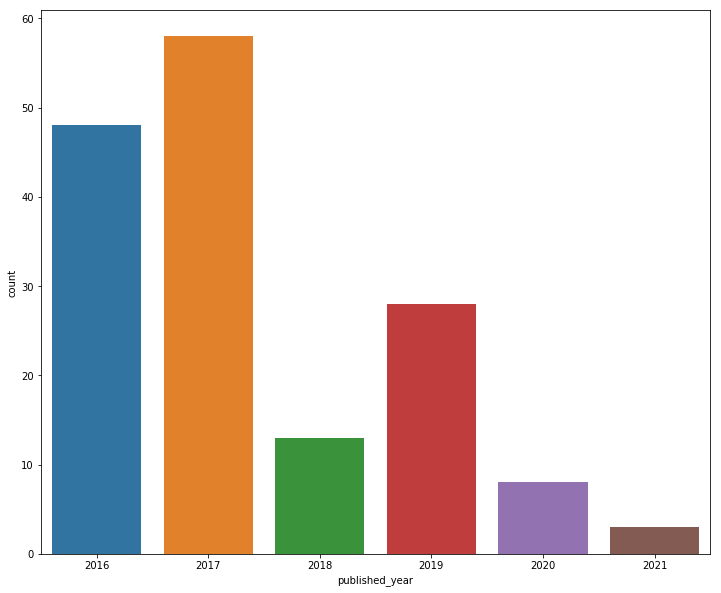

In [13]:
sns.countplot(data=df_vlog,x="published_year")

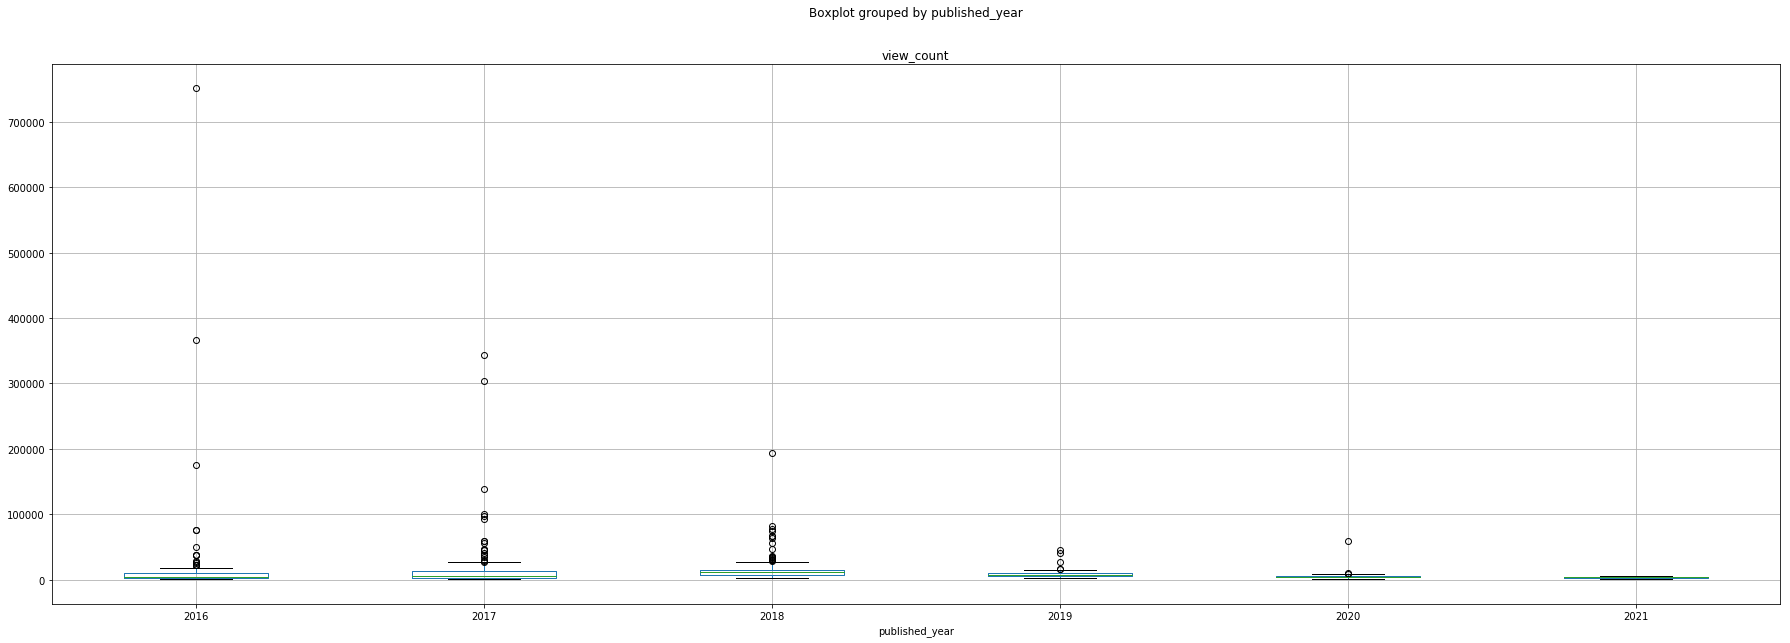

In [14]:
fig, ax = plt.subplots(figsize=(30,10))
plt.suptitle('')
df_non_na.boxplot(column="view_count",by="published_year",ax=ax)

In [15]:
def calc_iqr(year):
    year_data = df_non_na[df_non_na["published_year"]==year]
    q1 = year_data["view_count"].quantile(0.25)
    q3 = year_data["view_count"].quantile(0.75)
    iqr = q3-q1
    data = year_data[year_data["view_count"]>iqr]
    return data

In [16]:
iqr_2018 = calc_iqr(2018)
iqr_2019 = calc_iqr(2019)
iqr_2020 = calc_iqr(2020)
iqr_2021 = calc_iqr(2021)

In [89]:
outlier_db = pd.concat([iqr_2018,iqr_2019,iqr_2020,iqr_2021])

In [43]:
func = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'

In [51]:
def title_processing(x):
    a = re.sub(func," ",str(x))
    a = re.sub("[0-9]","",a)
    a = a.replace("\\n","")
    a = a.replace("│", " ")
    a = a.lower()
    
    return a

In [92]:
iqr_2018["title_2"] = iqr_2018["title"].apply(lambda x: title_processing(x))

In [95]:
iqr_2018["title_2"] = iqr_2018["title_2"].apply(lambda x: x.replace("  "," ")).apply(lambda x: x.replace("  "," "))

In [52]:
outlier_db["title"] = outlier_db["title"].apply(lambda x: title_processing(x))

In [56]:
outlier_db["title"].apply(lambda x: x.replace("  "," ")).apply(lambda x: x.replace("  "," "))

126                      언더아머 세일 지금이기회다 크리스마스 쇼핑 
130                   연말 소주 한 잔 feat 유니클로u 워라밸 ep
131              내가 스트렝스 훈련을 하지 않는 이유 click bait 
132                        는 훼이크 삶과 운동의 조화 워라밸 ep
133                           그냥 그렇게 한번쯤 힘든날 공허함 
134                  dell xps 언박싱 unboxing 워라밸 ep
135                      회사 대리님도 함께  가슴 펌핑 워라밸 ep
136                     홈트로 등운동 가슴운동은 거들 뿐 워라밸 ep
137                 어깨 작살 루틴 feat 흔한 회사 동기 워라밸 ep
139                         하기나 해 feat 바디닭 워라밸 ep
140                  언박싱 내가 언더아머를 입는 이유 워라밸 ep번외편
141             함께 해서 얻을 수 있는 것들 feat 유니클로 워라밸 ep
143               언더아머에서 만원 쇼핑 teaser 대 은 옛날 이야기 
144                    어쨌거나 힘들어도 배워야 산다 홈트 워라밸 ep
145                         스쿼트 kg 몇 개 하나요 워라밸 ep
146                                미스테리 그녀  워라밸ep
147               펑티모의 고양이송 가장 현실적인 리액션 reaction 
148                       가슴 운동 깔끔하게 운동 루틴 워라밸 ep
149                                      취업 중요할까 
150                         퇴근하고 kg 벤치프레스를 워라밸 ep


In [59]:
title = {}

for sentence in outlier_db["title"]:
    lst = sentence.split(" ")
    for text in lst:
        title[text] = title.get(text,0) + 1

In [101]:
title_2018 = {}

for sentence in iqr_2018["title_2"]:
    lst = sentence.split(" ")
    for text in lst:
        title_2018[text] = title_2018.get(text,0) + 1

In [102]:
title_2018

{'언더아머': 4,
 '세일': 1,
 '지금이기회다': 1,
 '크리스마스': 1,
 '쇼핑': 2,
 '': 49,
 '연말': 1,
 '소주': 1,
 '한': 1,
 '잔': 1,
 'feat': 7,
 '유니클로u': 1,
 '워라밸': 17,
 'ep': 44,
 '내가': 3,
 '스트렝스': 2,
 '훈련을': 1,
 '하지': 2,
 '않는': 1,
 '이유': 2,
 'click': 2,
 'bait': 2,
 '는': 1,
 '훼이크': 1,
 '삶과': 1,
 '운동의': 1,
 '조화': 1,
 '그냥': 1,
 '그렇게': 1,
 '한번쯤': 1,
 '힘든날': 1,
 '공허함': 1,
 'dell': 1,
 'xps': 1,
 '언박싱': 3,
 'unboxing': 2,
 '회사': 3,
 '대리님도': 1,
 '함께': 3,
 '가슴': 3,
 '펌핑': 1,
 '홈트로': 1,
 '등운동': 3,
 '가슴운동은': 1,
 '거들': 2,
 '뿐': 4,
 '어깨': 2,
 '작살': 1,
 '루틴': 5,
 '흔한': 1,
 '동기': 1,
 '하기나': 1,
 '해': 1,
 '바디닭': 1,
 '언더아머를': 1,
 '입는': 1,
 'ep번외편': 1,
 '해서': 1,
 '얻을': 1,
 '수': 2,
 '있는': 1,
 '것들': 2,
 '유니클로': 1,
 '언더아머에서': 1,
 '만원': 1,
 'teaser': 1,
 '대': 3,
 '은': 1,
 '옛날': 1,
 '이야기': 2,
 '어쨌거나': 1,
 '힘들어도': 1,
 '배워야': 1,
 '산다': 1,
 '홈트': 3,
 '스쿼트': 3,
 'kg': 8,
 '몇': 2,
 '개': 1,
 '하나요': 1,
 '미스테리': 1,
 '그녀': 3,
 '워라밸ep': 2,
 '펑티모의': 1,
 '고양이송': 1,
 '가장': 1,
 '현실적인': 1,
 '리액션': 1,
 'reaction': 1,
 '운동': 14,
 '깔끔하게': 1,
 '취업':

In [103]:
del title_2018['']

In [104]:
word_count = Counter(title_2018)
top10_word_2018 = word_count.most_common(10)

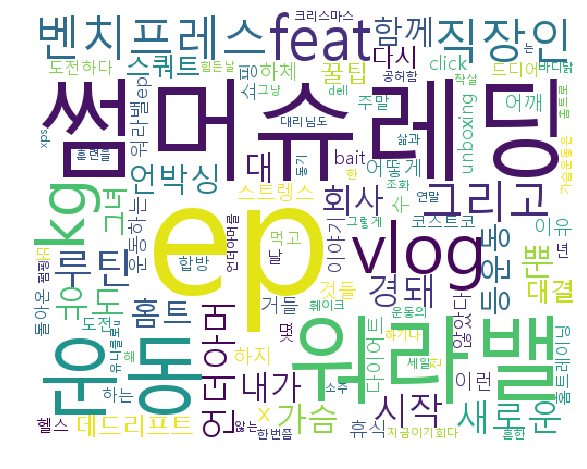

In [105]:
wc = WordCloud(font_path = "C:/Windows/Fonts/malgun.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")
fig = plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title_2018)
plt.imshow(wc_result)
plt.axis("off")
fig.savefig("outlier_wordcloud2018.png")

In [64]:
word_count = Counter(title)
top20_word = word_count.most_common(20)

In [81]:
wc = WordCloud(font_path = "C:/Windows/Fonts/malgun.ttf",width=500, height = 400, max_words=100, max_font_size=150, background_color="white")


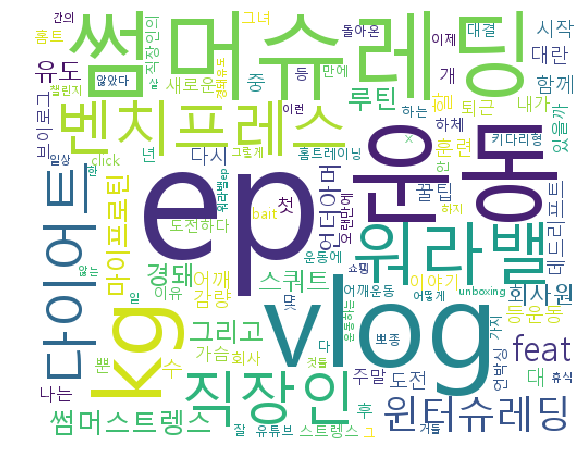

In [86]:
fig = plt.figure(figsize=(16,8))
wc_result = wc.generate_from_frequencies(title)
plt.imshow(wc_result)
plt.axis("off")
fig.savefig("outlier_wordcloud.png")

In [90]:
def title_pre(x):
    a = x.split("│")
    if len(a) > 1:
        result = a[1]
        result = result.lower()
        result = result.replace("vlog","브이로그")
        result = re.findall("[가-힣]{1,}", result)
        result = " ".join(result)
    else:
        result = ""
    return result

outlier_db["contents"] = outlier_db["title"].apply(lambda x: title_pre(x))

In [91]:
outlier_db["contents"].value_counts()

                          104
썸머슈레딩                      23
워라밸                        18
윈터슈레딩                      13
썸머스트렝스                      7
직장인                         5
직장인 브이로그                    2
운동유튜버 다 모였다 대란 공고           1
벤치프레스 몇 개                   1
칠리팸 브이로그                    1
쉑쉑버거 유도 벤치프레스 그리고           1
대운동                         1
어깨운동                        1
마이프로틴 할인코드                  1
언더아머 러쉬                     1
진지 주의                       1
헬창 브이로그                     1
다시 찾은 언더아머                  1
워라밸 번외편                     1
운동 휴식 그리고                   1
벤치프레스 도전                    1
브이로그                        1
대 뽀종에게 배워보는 등 운동            1
코리아테크 서울디자인리빙페어             1
유튜브 구글                      1
짐박스                         1
칠리 송년회                      1
마이프로틴 대란                    1
키다리형 어깨 운동 함께하기             1
집에만 있으면 뭐하나 하루 정도는 밖으로      1
터보소닉 진공 블렌더                 1
오픽 점수 구전녹용                  1
산속 트레이닝                     1
여친은 언제    